### Исследование продаж компьютерных игр в интернет-магазине

#### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:**
- Найти характерный срок появления новых и исчезновения старых платформ.
- Найти, какие платформы лидируют по продажам.
- Узнать, как влияют на продажи внутри платформ отзывы пользователей и критиков.
- Найти самые прибыльные жанры.
- Составить портрет пользователя каждого региона (NA, EU, JP).
- Проверка гипотез:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
  - Средние пользовательские рейтинги жанров Action и Sports разные?

**План исследования:**
- [Общая информация о данных.](#part_1)
- [Предобработка данных.](#part_2)
- [Исследовательский анализ данных.](#part_3)
- [Составление портрета пользователя каждого региона.](#part_4)
- [Проверка гипотез.](#part_5)
- [Общий вывод.](#part_6)


---

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

#### Общая информация о данных <a id='part_1'></a>

In [2]:
#загрузка данных
try:
    df = pd.read_csv('....')
except:
    df = pd.read_csv('....')

In [3]:
#общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#первые 10 строк
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных**:
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
#аномалии в числовых столбцах
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Видимые аномалии:**
- названия столбцов имеют разный стиль
- **Name**, название игры, есть пропуски
- **Year_of_Release**, год выпуска, есть не везде
- **Critic_Score**, **User_Score**, **Rating** имеют много пропусков
- числовые столбцы видимых аномалий значений не имеют
- столбцы с объемами продаж имеют много нулевых значений
- год выпуска имеет тип `float` вместо `int`
- **Critic_Score** вероятно также должен быть `int`
- **User_Score** должен имет тип `float`

**Итог общего обзора:**
- названия столбцов имеют разный стиль
- много пропусков
- много нулевых значений
- типы данных не соответствуют реальным

---

#### Предобработка данных <a id='part_2'></a>

In [6]:
#приводим столбцы к единому стилю (нижний регистр)
df.columns = df.columns.str.lower()

In [7]:
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
#количество пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#число уникальных названий
df['name'].value_counts()

Need for Speed: Most Wanted                          12
Ratatouille                                           9
LEGO Marvel Super Heroes                              9
Madden NFL 07                                         9
FIFA 14                                               9
                                                     ..
Jake Hunter Detective Story: Memories of the Past     1
Kanokon: Esuii                                        1
Game de Hakken!! Tamagotchi 2                         1
Disney's Brother Bear                                 1
Killer Loop                                           1
Name: name, Length: 11559, dtype: int64

In [10]:
#смотрим столбец названий
df['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [11]:
#уберем крайние пробелы
df['name'] = df['name'].str.strip()

2 случайных пропуска удалим

In [12]:
df = df.dropna(subset=['name'])

In [13]:
#количество пропусков
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Количество пропусков жанров также стало 0, это были те же 2 строки с пропусками.  \
Вероятно, это 2 случайных технических пропуска

---

In [14]:
#смотрим столбец платформ
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

---

In [15]:
#годы
df['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

При дальнейшем анализе много используем год релиза, поэтому случайные пропуски удаляем, процент пропусков менее 2%.  
Для корректного заполнения данных пропусков нужны  долгие поиски внешней информации.  
В названии игр год указан у очень небольшого числа.  
Почему у довольно большого числа игр не указан год выпуска, не очень понятно, при выпуске это всегда указывается, возможно, какие-то технические причины

In [16]:
#удаляем
df = df.dropna(subset=['year_of_release'])

In [17]:
#переведем в тип int
df['year_of_release'] = df['year_of_release'].astype('int')

---

In [18]:
#число уникальных значений жанров
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

---

In [19]:
#число уникальных оценок критиков
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [20]:
#пропуски
df['critic_score'].isna().sum()

8461

Число пропусков велико, нам нужны значения для анализа, можно либо заполнить пропуски медианой по платформе или по всему массиву, либо оставить пропуски.  
Оставляем пропуски

In [21]:
#переведем в тип float
df['critic_score'] = df['critic_score'].astype('float')

---

In [22]:
#число уникальных оценок юзеров
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Присутствует значение `tbd` (to be determined), т.е неизвестное, заменим его на `nan`

In [23]:
#заменим tbd
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [24]:
#переведем в тип float
df['user_score'] = df['user_score'].astype('float')

In [25]:
#пропуски
df['user_score'].isna().sum()

8981

Число пропусков велико, нам нужны значения для анализа, можно либо заполнить пропуски медианой по платформе или по всему массиву, либо оставить пропуски.  
Оставляем пропуски

Причины большого числа пропусков оценок критиков и игроков могут быть связаны с недостатками конкретного набора данных, со специальным удалением, с источником данных либо с особенностями самих игр: малая популярность, специфика дистрибуции и т.п.

---

In [26]:
#число уникальных рейтингов
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Изучим рейтинги в [вики](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board):
- Rating Pending (**RP**) - This symbol is used in promotional materials for games which have not yet been assigned a final rating by the ESRB
- Rating Pending (**RP**) Likely Mature 17+ - This symbol is used in promotional materials for games which have not yet been assigned a final rating by the ESRB, but are anticipated to carry a "Mature 17+" rating.
- Everyone (**E**) - 1994-1998 (as **K-A**), 1998-present (as **E**)
- Everyone 10+ (**E10+**)
- Teen (**T**)
- Mature 17+ (**M**)
- Adults Only 18+ (**AO**)
- Early Childhood (**EC**)

**RP** объединяет два похожих рейтинга, точнее, предварительный рейтинг.  
**K-A** - это старое название **E**

In [27]:
#заменим K-A на E
df['rating'] = df['rating'].replace('K-A', 'E')

In [28]:
#пропуски
df['rating'].isna().sum()

6676

Очень много пропусков, заменим пропуски на тип `unknown`.


In [29]:
#пропуски меняем на unknown
df['rating'] = df['rating'].fillna('unknown')

В таблице указаны только рейтинги североамериканской организации, в Японии и европейских странах свои системы рейтингов.  
Вероятно, часть пропусков - это именно отсутствие рейтингов других стран.  

In [30]:
#количество игр без рейтинга на рынке Северной Америки
df['name'][(df['rating'] == 'unknown') & (df['na_sales'] != 0)].count()

2988

Однако, и на рынке Северной Америки была масса игр без рейтинга, это пропуски скорее связаны с недостатками самого набора данных.

In [31]:
#пропуски
df['rating'].isna().sum()

0

---

In [32]:
#пропуски
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [34]:
#полные дубликаты
df.duplicated().sum()

0

Полных дубликатов нет

---

In [35]:
#посмотрим неявные дубликаты по имени, платформе и году релиза при унифицированном написании игр
df_temp = df.copy()
df_temp['name'] = df['name'].str.lower()
df_temp.duplicated(['name', 'platform', 'year_of_release']).sum()

1

In [36]:
#строка дубль
duplicate_rows_temp = df_temp[df_temp.duplicated(['name', 'platform', 'year_of_release'])]
duplicate_rows_temp

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [37]:
#неявные дубликаты по имени, платформе и году релиза без унификации
df_temp.duplicated(['name', 'platform', 'year_of_release']).sum()

1

In [38]:
#строка дубль
duplicate_rows = df[df.duplicated(['name', 'platform', 'year_of_release'])]
duplicate_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Регистр в именах игр на дубли не влияет

In [39]:
#удяляем неявные дубликаты
df.drop_duplicates(['name', 'platform', 'year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


---

In [40]:
#новый столбец - суммарные продажи по всем регионам
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [41]:
#10 строк
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
15876,Storm Lover 2nd V,PSV,2016,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02
9064,Terminator 3: Rise of the Machines,XB,2003,Action,0.11,0.03,0.00,0.01,35.0,2.0,T,0.15
3750,Jampack Volume 11,PS2,2004,Misc,0.26,0.20,0.00,0.07,NaN,NaN,unknown,0.53
1767,Derby Stallion III,SNES,1995,Sports,0.00,0.00,1.15,0.00,NaN,NaN,unknown,1.15
15741,Blood Bowl: Legendary Edition,PC,2010,Sports,0.00,0.01,0.00,0.00,73.0,6.4,T,0.01
2608,Star Ocean: The Last Hope,X360,2009,Role-Playing,0.32,0.20,0.21,0.06,72.0,7.2,T,0.79
14142,FabStyle,3DS,2011,Strategy,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
4322,Crash of the Titans,Wii,2007,Action,0.39,0.02,0.00,0.03,69.0,5.8,E10+,0.44
9926,Love Live! School Idol Paradise,PSV,2014,Misc,0.00,0.00,0.12,0.00,NaN,NaN,unknown,0.12
10592,Fallout 3 Game Add-On Pack: The Pitt and Opera...,X360,2009,Role-Playing,0.09,0.00,0.00,0.01,NaN,NaN,M,0.10


In [42]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


---

**Итог предобработки данных:**
- столбцы приведены к единому стилю
- пропуски удалены либо заполнены подходящими значениями
- частичные дубликаты удалены
- столбцы переведены в наиболее подходящий тип 
- создан новый столбец с суммарными продажами по всем регионам



---

#### Исследовательский анализ данных <a id='part_3'></a>

**Анализ игр по годам**

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [44]:
#сколько игр выпускалось в разные годы
df.groupby(by='year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

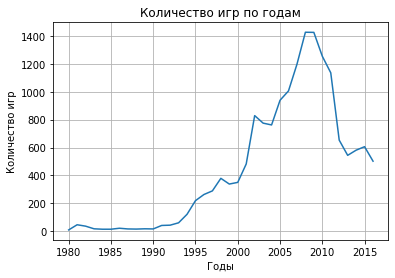

In [45]:
#сколько игр выпускалось в разные годы
df.groupby(by='year_of_release')['name'].count().plot();
plt.title('Количество игр по годам');
plt.xlabel('Годы');
plt.ylabel('Количество игр');
plt.grid();

Количество игр начинает стремительно расти с 1994 года.  
Пик количества выпуска новых названий игр приходится на 2008-2010 годы.  
В 2012-2016 года выпуск новых игр сильно снизился и установился нак уровне 500-600 шт. в год.  
Очевидно, что пик выпуска игр прошел и нас будут интересовать последние годы с 2012 года.

---

**Анализ платформ по годам и продажам**

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.  
За какой характерный срок появляются новые и исчезают старые платформы?

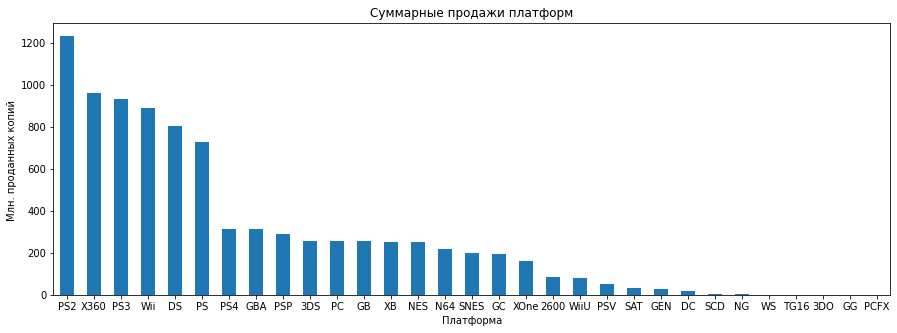

In [46]:
#платформы с наибольшими суммарными продажами
df.groupby('platform', observed=False)['global_sales'].sum().sort_values(ascending=False).plot(kind='bar', rot=0, figsize=(15, 5));
plt.title('Суммарные продажи платформ');
plt.ylabel('Млн. проданных копий ');
plt.xlabel('Платформа');

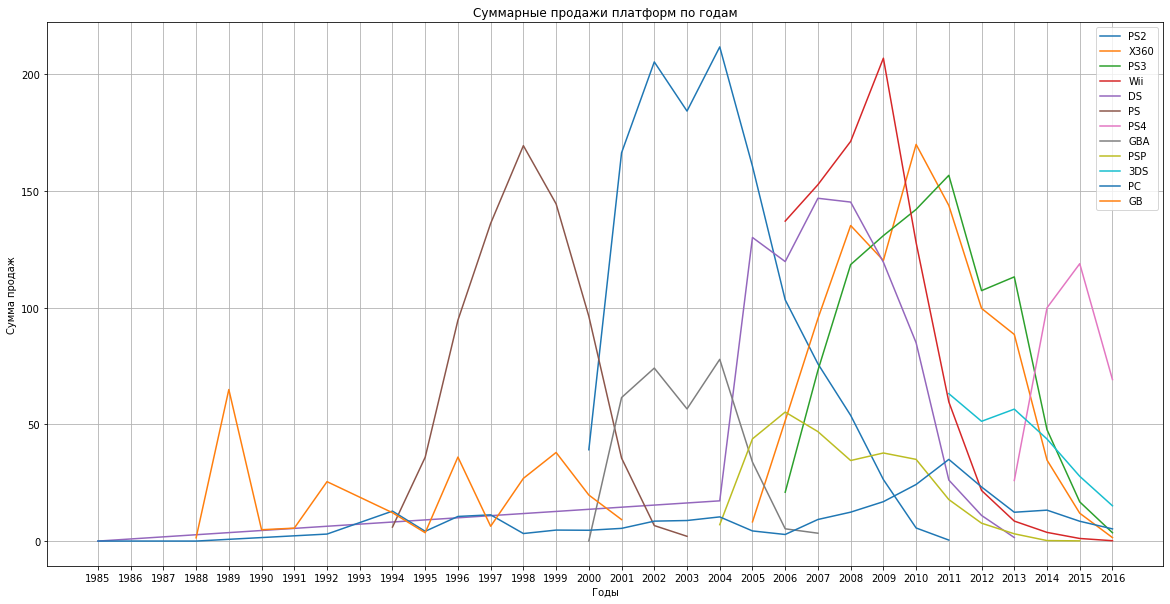

In [47]:
#распределение по годам для платформ с наибольшими суммарными продажами
plat_global_sales = df.groupby('platform', observed=False)['global_sales'].sum().sort_values(ascending=False).head(12)

for plat in list(plat_global_sales.index):
    ax = df[df['platform'] == plat].groupby('year_of_release')['global_sales'].sum().plot(label=plat, figsize=(20, 10));
plt.title('Cуммарные продажи платформ по годам');
plt.xlabel('Годы');
plt.ylabel('Сумма продаж');
plt.grid(True);
ax.set_xticks(range(1985, 2017))
plt.legend();

Характерный срок появления новых и исчезновения старых самых массовых платформ примерно 10 лет.  
До последнего времени срок выхода на пик продаж для новых платформ был 4-5 лет, затем шел спад.  
В последние годы у всех платформ идет спад и конец цикла, за исключениеем `PS4`, эта плаформа быстрее вышла на пик продаж и все еще сохраняет высокие продажи.  
Новые платформы появлялись: 1 - в 1994 году, 2 - в 2000 году, в 2004-2006 появилось 4 новых платформы.  
Для анализа примем **актуальный период** примерно в половину цикла, т.е. в 4-5 лет.  
В 2013 исчезает платформа `DS` и появлятся `PS4`, возьмем период 2013-2016 годы.

---

**Анализ платформ в актуальный период**

Какие платформы лидируют по продажам, растут или падают?  
Выберите несколько потенциально прибыльных платформ.

In [49]:
#возмем данные за актуальный период
df_2013 = df.query('year_of_release > 2012')

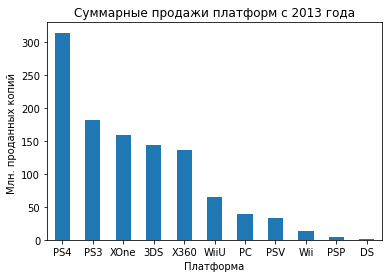

In [50]:
#платформы с максимальными продажами с 2013 года
df_2013.groupby('platform', observed=False)['global_sales'].sum().sort_values(ascending=False).plot(kind='bar', rot=0);
plt.title('Суммарные продажи платформ с 2013 года');
plt.ylabel('Млн. проданных копий ');
plt.xlabel('Платформа');

После 2013 года продавались всего 11 платформ, самыми продаваемыми были 5: `PS4`, `PS3`, `XOne`, `3DS` и `X360`.

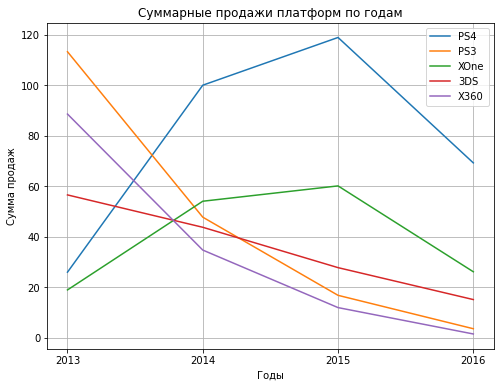

In [51]:
#распределение по годам для платформ с наибольшими суммарными продажами после 2013 года
top5_plat_2013 = list(df_2013.groupby('platform')['global_sales'].sum().sort_values(ascending=False).index[:5])

for plat in top5_plat_2013:
    ax = df_2013[df_2013['platform'] == plat].groupby('year_of_release')['global_sales'].sum() \
                                             .plot(label=plat, figsize=(8, 6));
plt.title('Cуммарные продажи платформ по годам');
plt.xlabel('Годы');
plt.ylabel('Сумма продаж');
plt.grid(True);
ax.set_xticks(range(2013, 2017))
plt.legend();

In [52]:
# Комментарий ревьюера
temp = df_2013.copy() 
list(temp.groupby('platform')['global_sales'].sum().sort_values(ascending=False).index[:5])

['PS4', 'PS3', 'XOne', '3DS', 'X360']

По продажам в последние годы лидируют `PS4`, `XOne`.  
У всех платформ падают продажи.
Пик продаж `PS4`, `XOne` пришелся на 2014-2015 годы, у `3DS`, `PS4` и `X360` - на более ранний период.  
`PS4`, `XOne` и `3DS` еще сохраняют более высокий уровень продаж.  
Кандидатами в наиболее продаваемые платформы в 2017 году будут 3: `PS4`, `XOne` и `3DS`.

---

**Анализ графика «ящик с усами» по глобальным продажам игр в разбивке по платформам**

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

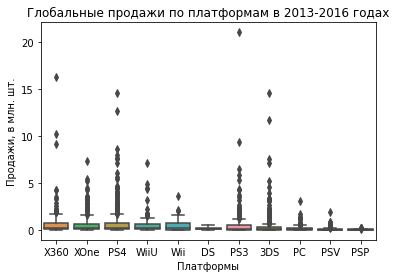

In [53]:
#построим диаграммы размаха по глобальным продажам для всех платформ, сортировка по медиане, width=0.5
my_order = df_2013.groupby('platform')['global_sales'].median().sort_values(ascending=False).index

sns.boxplot(x='platform', y='global_sales', hue='platform', data=df_2013, order=my_order, dodge=False)
plt.title('Глобальные продажи по платформам в 2013-2016 годах');
plt.xlabel('Платформы');
plt.ylabel('Продажи, в млн. шт.');
plt.legend().remove();

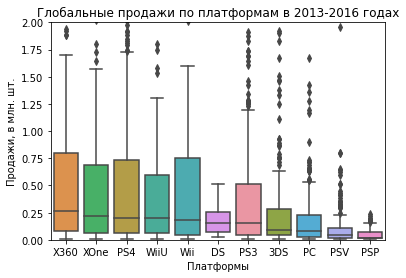

In [54]:
#построим диаграммы размаха по глобальным продажам для всех платформ, сортировка по медиане, крупно
sns.boxplot(x='platform', y='global_sales', hue='platform', data=df_2013, order=my_order, dodge=False)
plt.title('Глобальные продажи по платформам в 2013-2016 годах');
plt.xlabel('Платформы');
plt.ylabel('Продажи, в млн. шт.');
plt.ylim(0, 2);
plt.legend().remove();

У нескольких платформ много далеких выбросов вверх. Т.е. некоторые отдельные игры очень хорошо продавались.  
По усредненным показателям выделяются 2 группы: первая - `X360`, `XOne`,`PS4`,`WiiU`,`Wii` и `PS3`, вторая - `DS`, `3DS`,`PC`,`PSV`,`PSP`.  
Первые гораздо лучше продавались, вторые - намного хуже.  
Что выражается более высокой медианой и размерами 3 квартиля.

---

**Анализ влияния на продажи отзывов пользователей и критиков**

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.

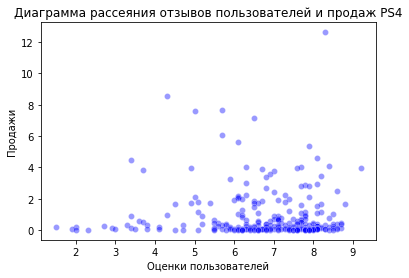

'Коэфициент корреляции отзывов пользователей и продаж PS4: -0.032'

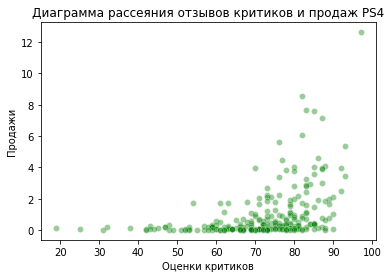

'Коэфициент корреляции отзывов критиков и продаж PS4: 0.407'

--------------------------------------------------------------------------------


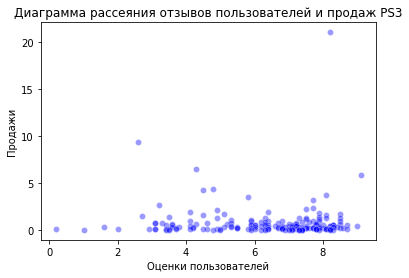

'Коэфициент корреляции отзывов пользователей и продаж PS3: 0.002'

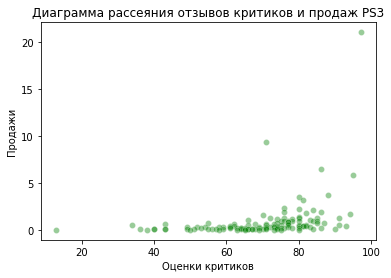

'Коэфициент корреляции отзывов критиков и продаж PS3: 0.334'

--------------------------------------------------------------------------------


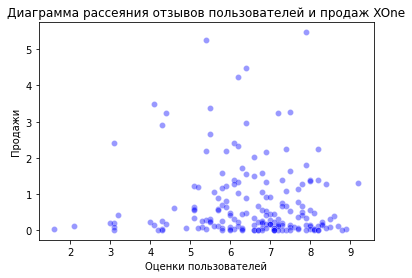

'Коэфициент корреляции отзывов пользователей и продаж XOne: -0.069'

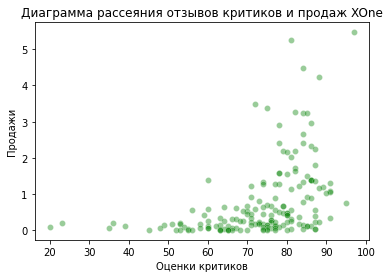

'Коэфициент корреляции отзывов критиков и продаж XOne: 0.417'

--------------------------------------------------------------------------------


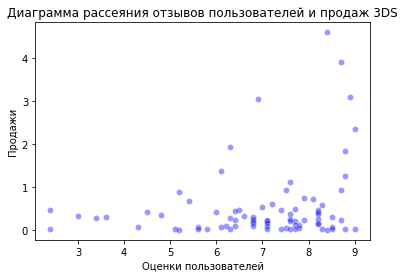

'Коэфициент корреляции отзывов пользователей и продаж 3DS: 0.242'

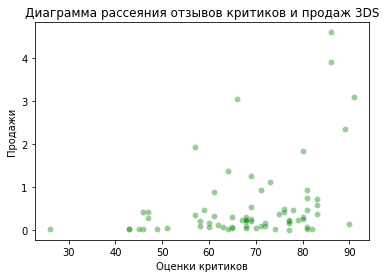

'Коэфициент корреляции отзывов критиков и продаж 3DS: 0.357'

--------------------------------------------------------------------------------


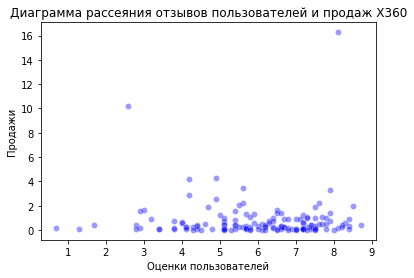

'Коэфициент корреляции отзывов пользователей и продаж X360: -0.012'

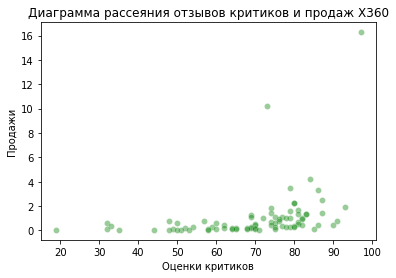

'Коэфициент корреляции отзывов критиков и продаж X360: 0.35'

--------------------------------------------------------------------------------


In [55]:
#диаграммы рассеяния отзывов пользователей/критиков и продаж и коэфициенты корреляции для топ 5 платформ
for plat in top5_plat_2013:
    df_plat = df_2013.loc[df_2013['platform'] == plat]

    sns.scatterplot(data=df_plat, x=df_plat['user_score'], y=df_plat['global_sales'], alpha=0.4, color='b');
    plt.title(f'Диаграмма рассеяния отзывов пользователей и продаж {plat}');
    plt.xlabel('Оценки пользователей');
    plt.ylabel('Продажи');
    plt.show();
    display(f'Коэфициент корреляции отзывов пользователей и продаж {plat}: ' + \
        str(df_2013.loc[df_2013['platform'] == plat]['global_sales'] \
       .corr(df_2013.loc[df_2013['platform'] == plat]['user_score']).round(3)))
    
    sns.scatterplot(data=df_plat, x=df_plat['critic_score'], y=df_plat['global_sales'], alpha=0.4, color='g');
    plt.title(f'Диаграмма рассеяния отзывов критиков и продаж {plat}');
    plt.xlabel('Оценки критиков');
    plt.ylabel('Продажи');
    plt.show();
    display(f'Коэфициент корреляции отзывов критиков и продаж {plat}: ' + \
        str(df_2013.loc[df_2013['platform'] == plat]['global_sales'] \
       .corr(df_2013.loc[df_2013['platform'] == plat]['critic_score']).round(3)))
    
    print('-' * 80)    


У платформ `PS4`, `PS3`, `XOne`, `X360` для отзывов критиков заметна некоторая корреляция между значениями, но не очень сильная, отзывы пользователей же хаотичны и корреляции не видно.  
Чем выше оценка критиков, тем больше продажи у этих платформ.  

У платформы `3DS` наблюдется слабая корреляция в обоих случаях, с оценками критиков и пользователей.  
Как мы узнаем ниже, `3DS` - любимая платфома в Японии, возможно, там немного иная культура оценок и их влияния.  

Платформы `PS4`, `XOne` характерны для Северной Америки и Европы.

**В целом продажи коррелируют с оценками критиков и не коррелируют либо слабо коррелируют с отзывами пользователей.**

---

**Общее распределение игр по жанрам**

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [56]:
#посмотрим продажи по жанрам с 2013 года
df_2013.groupby('genre', observed=False)['global_sales'].agg(['count', 'sum', 'median', 'mean', 'max', 'std']) \
                                                        .sort_values(by='median', ascending=False).round(2)

,count,sum,median,mean,max,std
genre,,,,,,
Shooter,187,232.98,0.45,1.25,14.63,2.01
Sports,214,150.65,0.24,0.70,8.58,1.22
Platform,74,42.63,0.22,0.58,4.32,0.81
Role-Playing,292,145.89,0.12,0.50,14.60,1.35
Fighting,80,35.31,0.12,0.44,7.55,1.05
Racing,85,39.89,0.12,0.47,7.09,0.96
Action,766,321.87,0.11,0.42,21.05,1.25
Simulation,62,21.76,0.10,0.35,5.22,0.85
Misc,155,62.82,0.10,0.41,9.18,1.01


Самым популярным жанром по количеству игр с большим отрывом является `Action`, затем идут `Role-Playing`, `Adventure` и `Sports`.  \
Самым продаваемым жанром из-за объема также является `Action`, затем идут `Shooter`, `Sports` и `Role-Playing`.  \
Самыми выгодными в среднем являются жанры `Shooter`, `Sports` и `Platform`.  \
В жанрах  `Action`, `Shooter` и `Sports` и `Role-Playing` есть очень дорогие игры.  \
Аутсайдерами общих продаж являются `Puzzle`, `Strategy`,  `Simulation` и `Fighting`.  \
Самыми невыгодными в среднем являются жанры `Adventure`, `Puzzle` и `Strategy`.


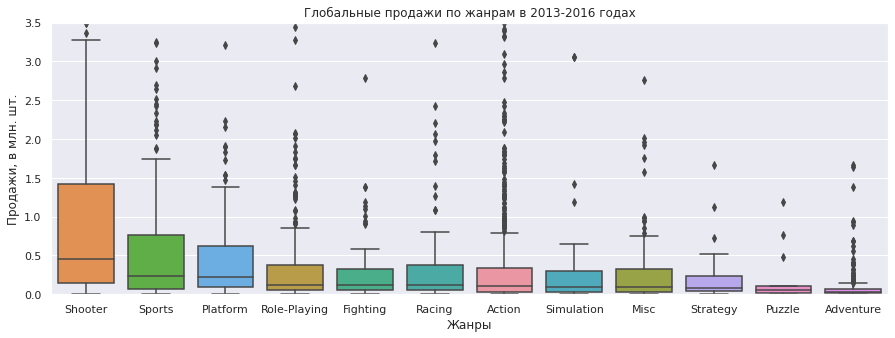

In [57]:
#построим диаграммы размаха по глобальным продажам для всех жанров, сортировка по медиане
my_order = df_2013.groupby('genre')['global_sales'].median().sort_values(ascending=False).index
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x='genre', y='global_sales', hue='genre', data=df_2013, order=my_order, dodge=False)
plt.title('Глобальные продажи по жанрам в 2013-2016 годах');
plt.xlabel('Жанры');
plt.ylabel('Продажи, в млн. шт.');
plt.legend().remove();
plt.ylim(0, 3.5);

---

**Итог анализа данных:**
- Количество игр начинает стремительно расти с 1994 года. Пик количества выпуска новых названий игр приходится на 2008-2010 годы. В 2012-2016 года выпуск новых игр сильно снизился и установился нак уровне 500-600 шт. в год. Пик выпуска игр прошел и нас будут интересовать последние годы с 2012 года.
- Характерный срок появления новых и исчезновения старых платформ примерно 10 лет. До последнего времени срок выхода на пик продаж для новых платформ был 4-5 лет, затем шел спад.
- Был выбран актуальный период в примерно в полцикла (2013-2016 годы). 2013 год пограничный, исчезает платформа `DS` и появлятся `PS4`.
- Платформы с наибольшими суммарными продажами в актуальный период: `PS4`, `PS3`, `XOne`, `3DS` и `X360`.
- Были выбраны потенциально прибыльные платформы в актуальный период: `PS4`, `XOne` и `3DS`.
- После анализа диаграмм размаха по глобальным продажам игр по усредненным показателям выделяются 2 группы платформ: первая, более продаваемая - `X360`, `XOne`,`PS4`,`WiiU`,`Wii` и `PS3`, вторая, менее продаваемая - `DS`, `3DS`,`PC`,`PSV`,`PSP`. 
- Для платформ `PS4`, `PS3`, `XOne`, `X360` оценки критиков и продаж скоррелированы, отзывы пользователей и продажи скорее нет. У платформы `3DS` наблюдется слабая корреляция в обоих случаях.
- Самыми выгодными в среднем являются жанры `Shooter`, `Sports` и `Platform`. Самыми невыгодными в среднем являются жанры `Adventure`, `Puzzle` и `Strategy`.


---

#### Составление портрета пользователя каждого региона <a id='part_4'></a>

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

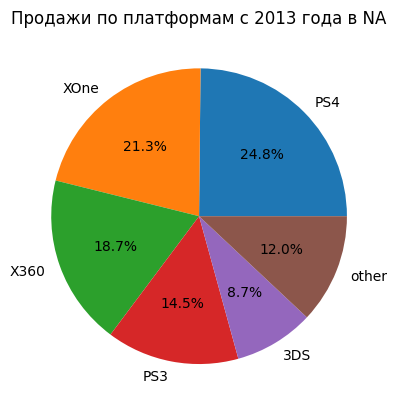

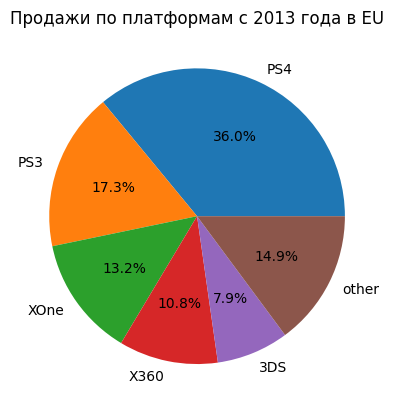

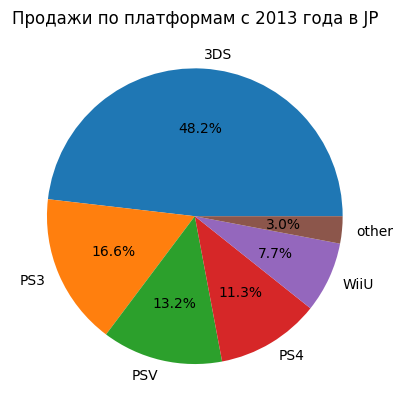

In [58]:
#посмотрим продажи по платформам по регионам с 2013 года
list_reg = ['na_sales', 'eu_sales', 'jp_sales']
plt.style.use('default')
for reg in list_reg:
    plat_all = df_2013.groupby('platform', observed=False)[reg].agg('sum').sum()
    plat_5 = df_2013.groupby('platform', observed=False)[reg].agg('sum').sort_values(ascending=False).head()
    plat_5['other'] = plat_all - plat_5.sum();
    ax = plat_5.plot.pie(autopct='%.1f%%')
    plt.title('Продажи по платформам с 2013 года в ' + reg.replace('_sales', '').upper());
    ax.set_ylabel('')
    plt.show();
    

В топ-5 платформ в Северной Америке входят `PS4`, `XOne`, `X360`, `PS3` и `3DS`.  \
В топ-5 платформ в Европе входят `PS4`, `PS3`, `XOne`, `X360`, `3DS`.  \
Одинаковый набор платформ.  \
В Европе сильно выделется `PS4`, в Северной Америке такого большого отрыва нет.  \
В Японии лидируют `3DS`, `PS3` и `PSV`. Причем,  `3DS` занимает половину рынка. \
Платформы `PSV` и `WiiU` возможно как-то связаны с местным рынком.

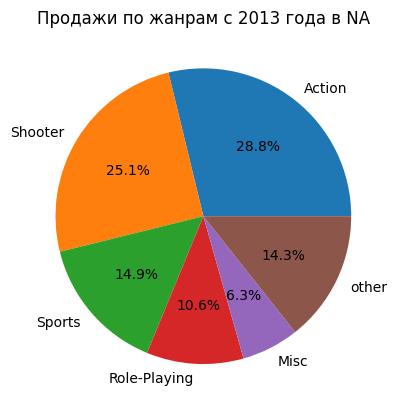

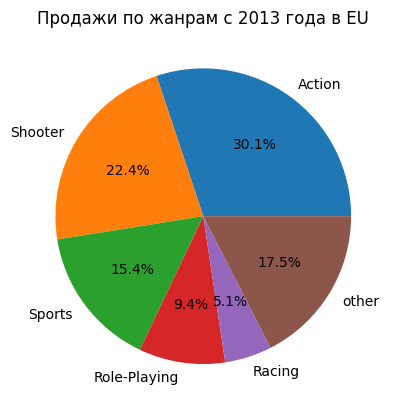

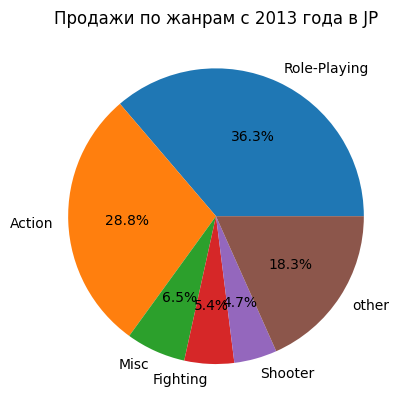

In [59]:
#посмотрим самые популярные жанры по регионам с 2013 года

for reg in list_reg:
    genre_all = df_2013.groupby('genre', observed=False)[reg].agg('sum').sum()
    genre_5 = df_2013.groupby('genre', observed=False)[reg].agg('sum').sort_values(ascending=False).head()
    genre_5['other'] = genre_all - genre_5.sum()
    ax = genre_5.plot.pie(autopct='%.1f%%');
    plt.title('Продажи по жанрам с 2013 года в ' + reg.replace('_sales', '').upper());
    ax.set_ylabel('')
    plt.show();

В топ-5 жанров в Северной Америке входят `Action`, `Shooter`, `Sports`, `Role-Playing` и графа прочие.  \
В топ-5 жанров в Европе входят 4 первых в том же порядке и `Racing`.  \
В Северной Америке и Европе очень схожее распределение по продажам по жанрам.  \
В Японии сильно выделяются 2 жанра: `Role-Playing` и `Action`, остальные имеют в разы меньшие продажи.  

---

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

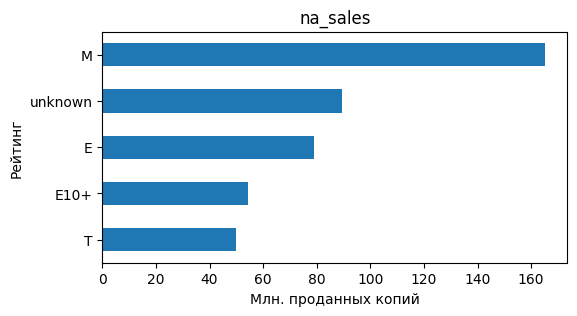

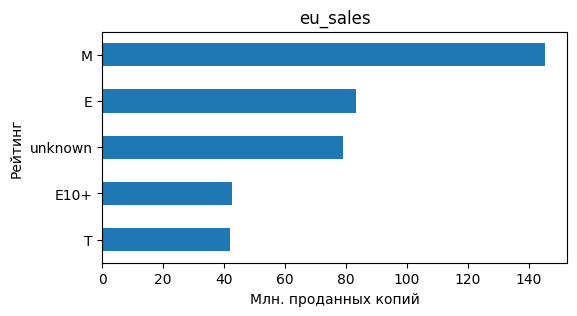

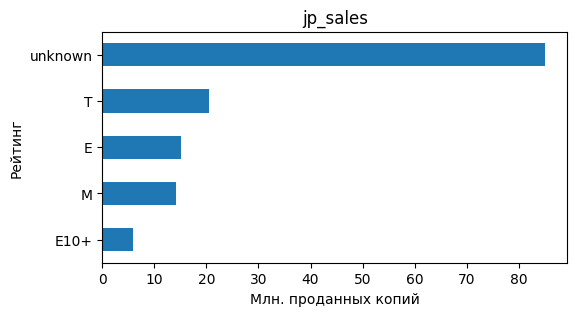

In [60]:
#графики продаж в зависимости от рейтинга с 2013 года
for reg in list_reg:
    df_2013.pivot_table(index='rating', values=reg, aggfunc='sum') \
           .sort_values(by=reg, ascending=True) \
           .plot(kind='barh', title=reg, figsize=(6, 3));
    plt.ylabel('Рейтинг');
    plt.xlabel('Млн. проданных копий');
    plt.legend().remove();
    plt.show();

Рынки Северной Америки и Европы в целом очень похожи, с большим отрывом лидируют игры с рейтингом `M` (17+ для взрослых).  
Второй по популярности в продажах (где известен рейтинг) рейтинг `E` (дети, для всех).  
В Японии большая часть игр не имеет рейтинг ESRB, возможно, там используется своя система рейтингов.  
ESRB изначально североамериканская организация.  
В Японии из игр с рейтингом ESRB наиболее популярны игры с рейтингом `T` (подростки, с 13 лет и старше).


---

**Общий вывод**  

Портрет пользователя каждого региона:
- Игрок в Северной Америке - платформы `PS4`, `XOne`, `X360`, жанры `Action`, `Shooter` с рейтингом `M` и `E`.
- Игрок в Европе - платформы `PS4`, `PS3`, `XOne`, жанры `Action`, `Shooter`, `Sports` с рейтингом `M` и `E`.
- Игрок в Японии - платформы `3DS`, `PS3`, `PSV`, жанры `Role-Playing`, `Action` без рейтинга ESRB.

В целом игроки в Северной Америке похожи на игроков в Европе.  
И оба сильно отличаются от игрока в Японии.



---

#### Проверка гипотез <a id='part_5'></a>

Проверка гипотезы:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

**Нулевая гипотеза**: средние пользовательские рейтинги платформ `Xbox One` и `PC` **одинаковые**.  \
**Альтернативная гипотеза**: средние пользовательские рейтинги платформы `Xbox One` и `PC` **неодинаковые**.

In [61]:
#задаем уровень значимости
alpha = 0.05

#пользовательские рейтинги платформ после 2012 года
xone_rate = df_2013.loc[df_2013['platform'] == 'XOne', 'user_score']
pc_rate = df_2013.loc[df_2013['platform'] == 'PC', 'user_score']

#проводим ttest для двух независимых наборов
results = st.ttest_ind(xone_rate, pc_rate, nan_policy='omit')

print(f'p-value: {results.pvalue}')

#проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.14012658403611503
Нет оснований отвергнуть нулевую гипотезу


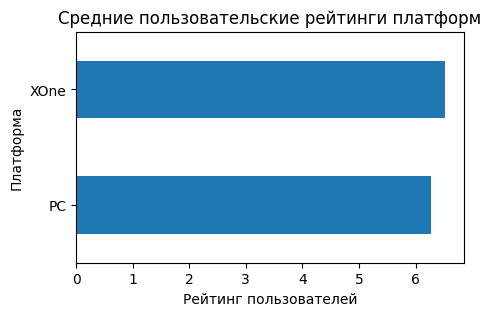

In [62]:
#средние пользовательские рейтинги платформ
df_2_plat = df_2013.loc[(df_2013['platform'] == 'XOne') | (df_2013['platform'] == 'PC')]
df_2_plat.groupby('platform')['user_score'].mean().plot(kind='barh', figsize=(5,3))
plt.title('Средние пользовательские рейтинги платформ');
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Платформа');

Мы не может отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.  
Средние пользовательские рейтинги платформ довольно близки.

---

Проверка гипотезы:  
Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

**Нулевая гипотеза**: средние пользовательские рейтинги игр жанров `Action` и `Sports` **одинаковые**.  \
**Альтернативная гипотеза**: средние пользовательские рейтинги игр жанров `Action` и `Sports` **неодинаковые**.

In [63]:
#задаем уровень значимости
alpha = 0.05

#пользовательские рейтинги жанров после 2012 года
action_rate = df_2013.loc[df_2013['genre'] == 'Action', 'user_score']
sports_rate = df_2013.loc[df_2013['genre'] == 'Sports', 'user_score']

#проводим ttest для двух независимых наборов
results = st.ttest_ind(action_rate, sports_rate, nan_policy='omit')

print(f'p-value: {results.pvalue}')

#проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


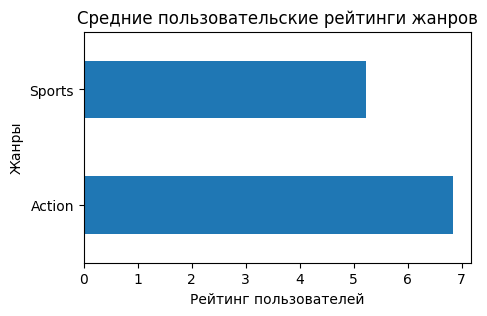

In [64]:
#средние пользовательские рейтинги жанров
df_2_genre = df_2013.loc[(df_2013['genre'] == 'Action') | (df_2013['genre'] == 'Sports')]
df_2_genre.groupby('genre')['user_score'].mean().plot(kind='barh', figsize=(5,3))
plt.title('Средние пользовательские рейтинги жанров');
plt.xlabel('Рейтинг пользователей');
plt.ylabel('Жанры');

Отвергаем гипотезу о том, что средние пользовательские рейтинги платформ жанров `Action` и `Sports` одинаковые.  
Средние пользовательские рейтинги жанров весьма отличаются.

В обоих случаях применяем двустроннюю альтернативную гипотезу и применяем T-тест для двух независимых наборов, пропуская `NaN`, со стандартным пороговым значением в 0,05.  

Нулевая гипотеза формулируется из расчета равенства двух средних показателей.  
Двусторонняя альтернативная гипотеза формулируется как обратная к нулевой - из расчета неравенства двух средних показателей.  
В первом случае (платформ) исходный вопрос совпадает с формулировкой нулевой гипотезы.  
Во втором случае (жанров) исходный вопрос противоположен формулировке нулевой гипотезы.

**Общий вывод**  

Мы не может отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.  
Отвергли гипотезу о том, что средние пользовательские рейтинги платформ жанров `Action` и `Sports` одинаковые.


  

    


---

#### Общий вывод <a id='part_6'></a>

**Цель исследования:**
- Найти характерный срок появления новых и исчезновения старых платформ.
- Найти, какие платформы лидируют по продажам.
- Узнать, как влияют на продажи внутри платформ отзывы пользователей и критиков.
- Найти самые прибыльные жанры.
- Составить портрет пользователя каждого региона (NA, EU, JP).
- Проверка гипотез:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
  - Средние пользовательские рейтинги жанров Action и Sports разные?

**Исходные данные**: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы

**Предобработка данных:** проанализированы пропуски, пропуски удалены либо заполнены подходящими значениями, частичные дубликаты удалены, добавлен необходимый новый столбец

**Проанализированы данные:**
- Количество игр начинает стремительно расти с 1994 года. Пик количества выпуска новых названий игр приходится на 2008-2010 годы. В 2012-2016 года выпуск новых игр сильно снизился и установился нак уровне 500-600 шт. в год. Пик выпуска игр прошел и нас будут интересовать последние годы с 2012 года.
- Характерный срок появления новых и исчезновения старых самых массовых платформ примерно 10 лет. До последнего времени срок выхода на пик продаж для новых платформ был 4-5 лет, затем шел спад.
- Был выбран актуальный период в примерно в полцикла (2013-2016 годы). 2013 год пограничный, исчезает платформа `DS` и появлятся `PS4`.
- Платформы с наибольшими суммарными продажами в актуальный период: `PS4`, `PS3`, `XOne`, `3DS` и `X360`.
- Были выбраны потенциально прибыльные платформы в актуальный период: `PS4`, `XOne` и `3DS`.
- После анализа диаграмм размаха по глобальным продажам игр по усредненным показателям выделяются 2 группы платформ: первая, более продаваемая - `X360`, `XOne`,`PS4`,`WiiU`,`Wii` и `PS3`, вторая, менее продаваемая - `DS`, `3DS`,`PC`,`PSV`,`PSP`.
- Для платформ `PS4`, `PS3`, `XOne`, `X360` оценки критиков и продаж скоррелированы, отзывы пользователей и продажи скорее нет. У платформы `3DS` наблюдется слабая корреляция в обоих случаях.
- Самыми выгодными в среднем являются жанры `Shooter`, `Sports` и `Platform`. Самыми невыгодными в среднем являются жанры `Adventure`, `Puzzle` и `Strategy`.

**Составление портрета пользователя каждого региона:**
- Игрок в Северной Америке - платформы `PS4`, `XOne`, `X360`, жанры `Action`, `Shooter` с рейтингом `M` и `E`.
- Игрок в Европе - платформы `PS4`, `PS3`, `XOne`, жанры `Action`, `Shooter`, `Sports` с рейтингом `M` и `E`.
- Игрок в Японии - платформы `3DS`, `PS3`, `PSV`, жанры `Role-Playing`, `Action` без рейтинга ESRB.

В целом игроки в Северной Америке похожи на игроков в Европе.  
И оба сильно отличаются от игрока в Японии.

**Итоги проверки гипотез:**
- Мы не может отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.  
- Отвергли гипотезу о том, что средние пользовательские рейтинги платформ жанров `Action` и `Sports` одинаковые.

**Рекомендации:**  

Если выбрать продукты для рекламной кампании в 2017 году для Северной Америки и Европы, то это может быть игра на платформе `PS4` или `XOne` в жанре `Action` или `Shooter` с рейтингом `M` и `E` с учетом оценок критиков. \
Аналогично для Японии - это может быть игра на платформе `3DS` в жанре `Role-Playing` или `Action` без рейтинга ESRB с учетом оценок критиков.  
Те же рекомендации для планирования продаж игр в 2017 году.



